___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

https://github.com/mwaskom/seaborn

https://seaborn.pydata.org/index.html

https://seaborn.pydata.org/examples/index.html

___
## Imports

In [16]:
import seaborn as sns

sns.set_theme(style="darkgrid")

## Data
Seaborn comes with built-in data sets!

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


## distplot

The distplot shows the distribution of a univariate set of observations.

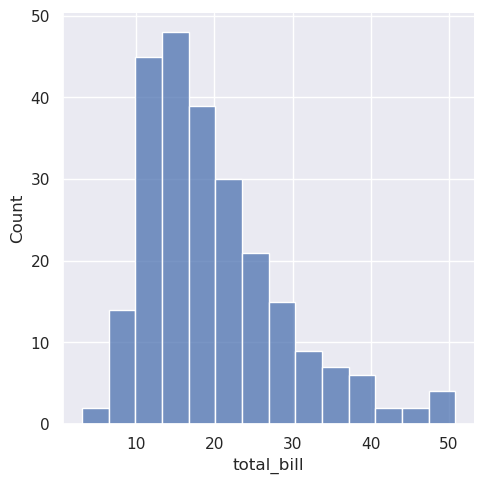

In [17]:
sns.displot(tips['total_bill'])


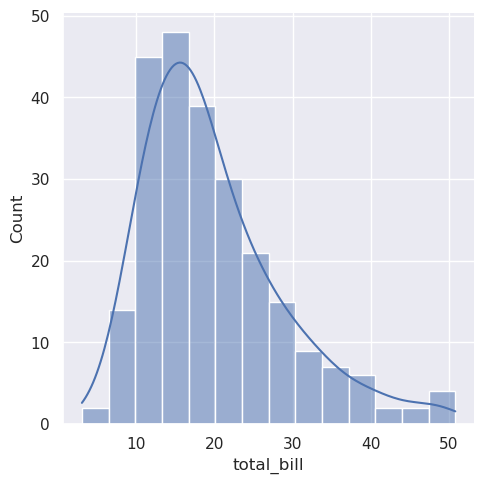

In [18]:
sns.displot(tips['total_bill'], kde=True,)
# Safe to ignore warnings

<Axes: xlabel='total_bill', ylabel='Count'>

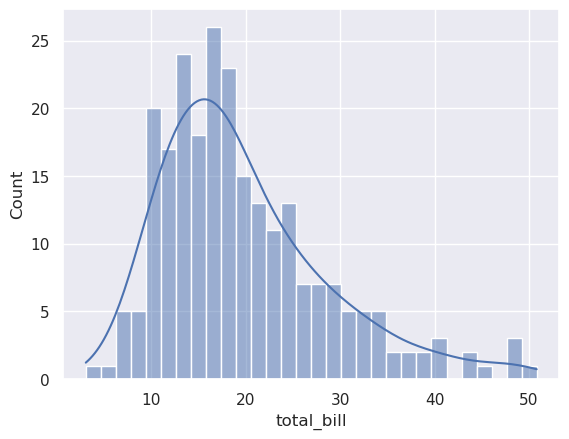

In [19]:
sns.histplot(tips['total_bill'], kde=True, bins=30)


To remove the kde layer and just have the histogram use:

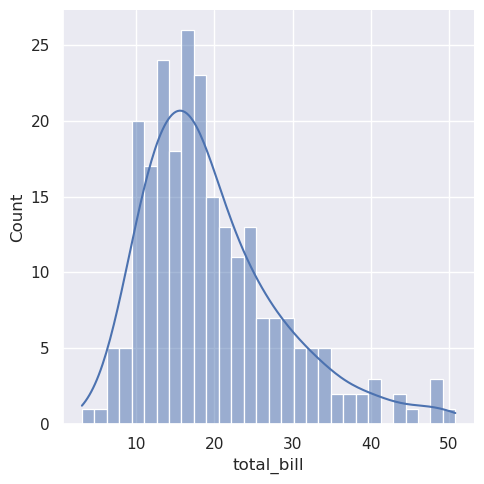

In [20]:
sns.displot(tips['total_bill'],kde=True,bins=30)

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with: 
* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”

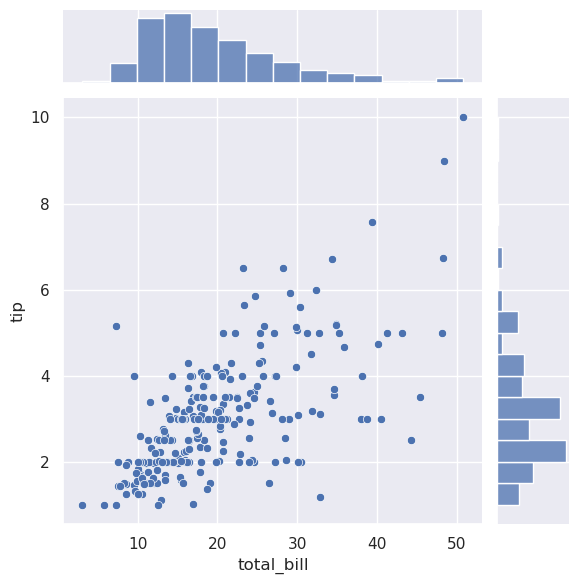

In [21]:
sns.jointplot(x='total_bill',y='tip',data=tips)

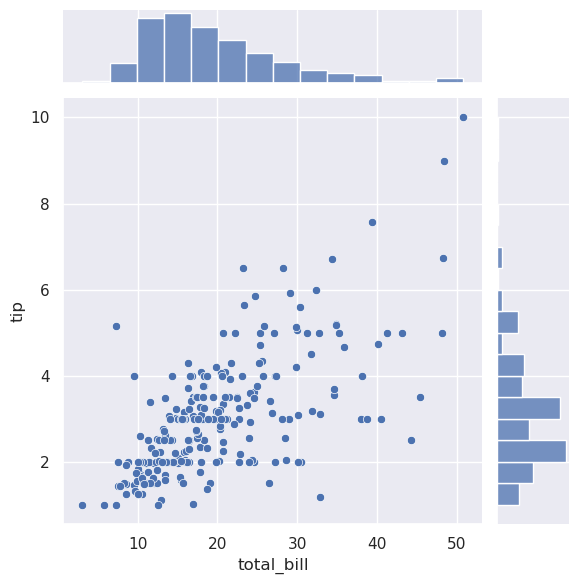

In [22]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='scatter')

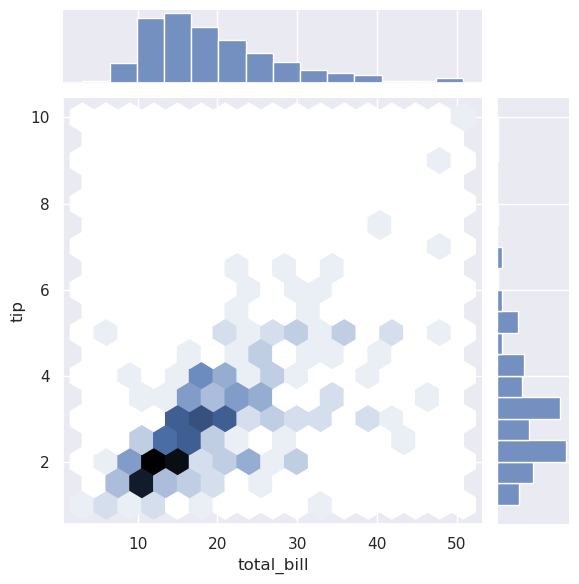

In [23]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')


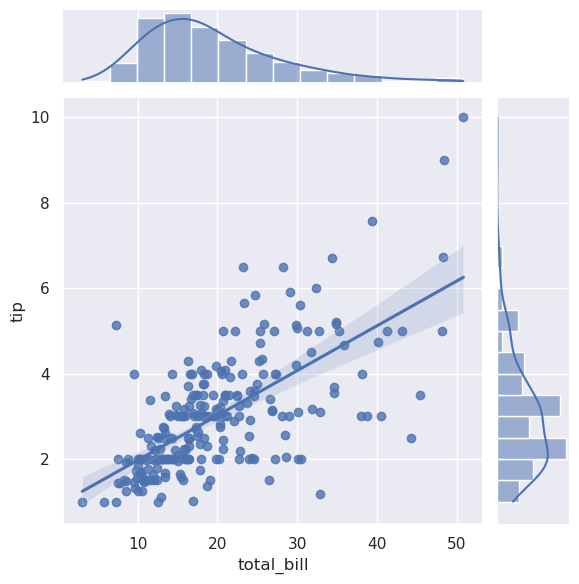

In [24]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='reg')


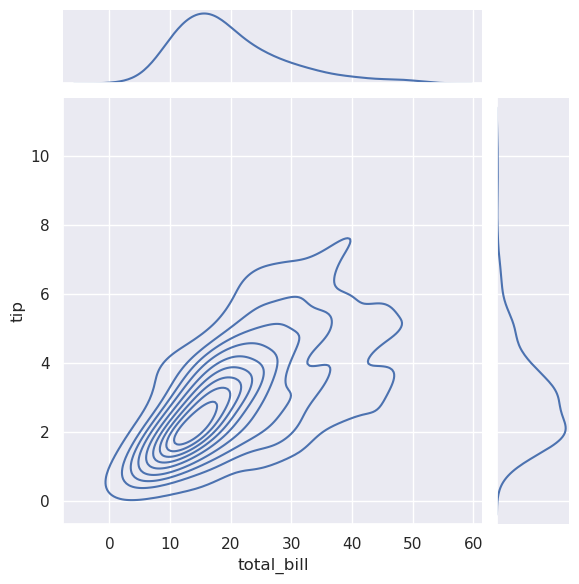

In [25]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')


## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

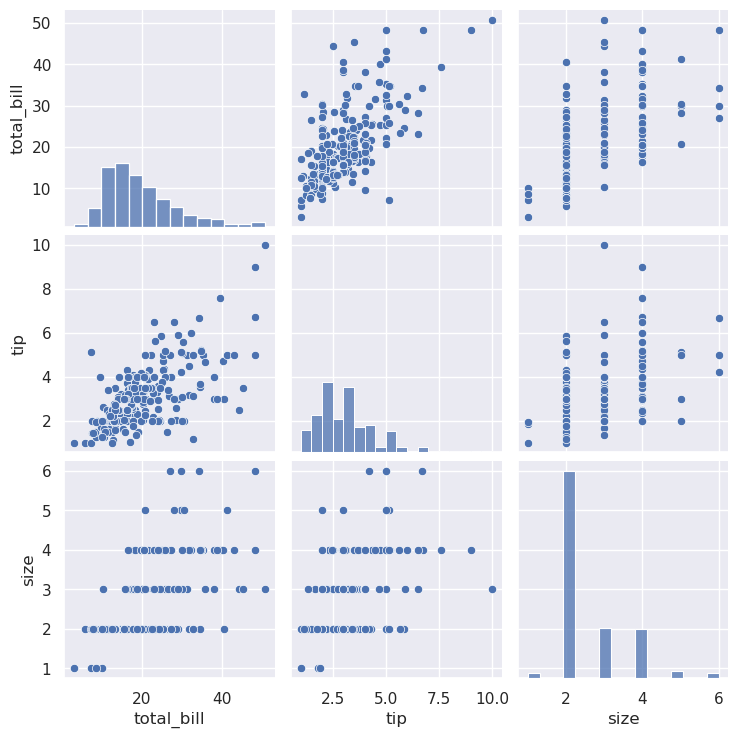

In [26]:
# makes a jointplot for every posible combination of numerical columns
sns.pairplot(tips)

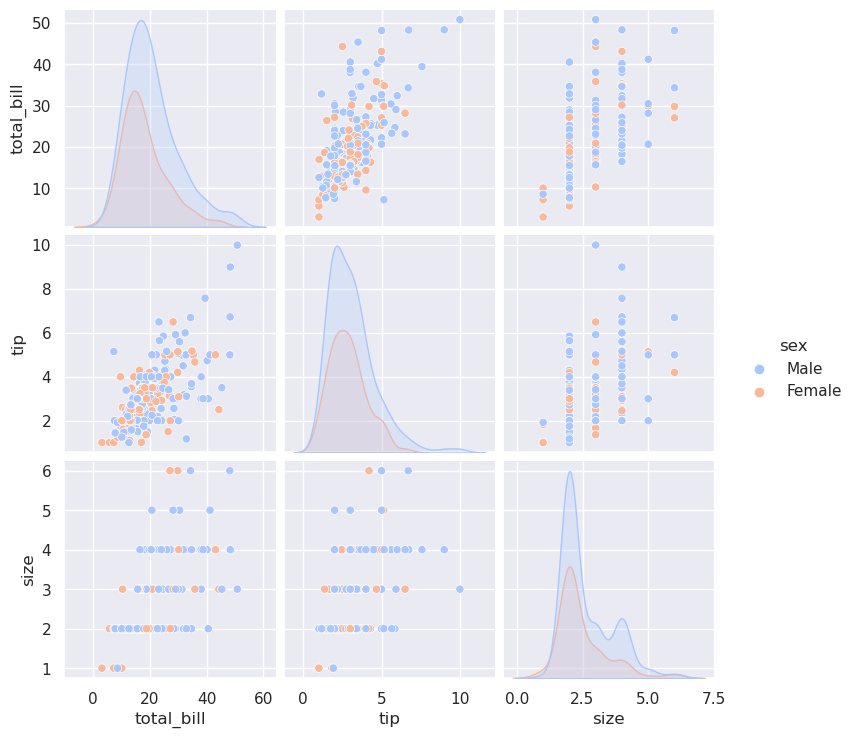

In [28]:
# hue for categorical columns
sns.pairplot(tips, hue="sex", palette='coolwarm')

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

<Axes: xlabel='total_bill'>

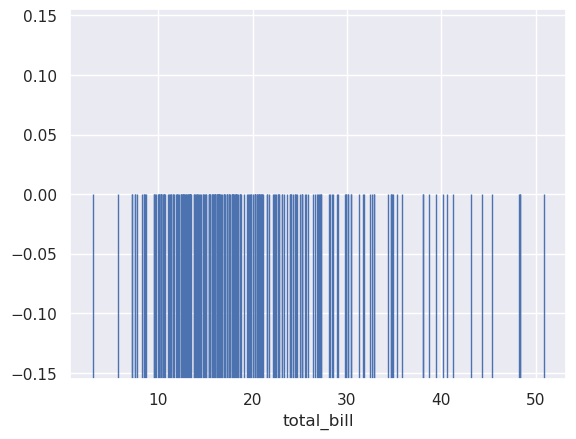

In [32]:
# draws a dash mark line for each value in the column
sns.rugplot(tips['total_bill'], height=0.5)

## kdeplot (Kernel Density Estimation plot)

https://en.wikipedia.org/wiki/Normal_distribution

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:

(0.0, 1.0)

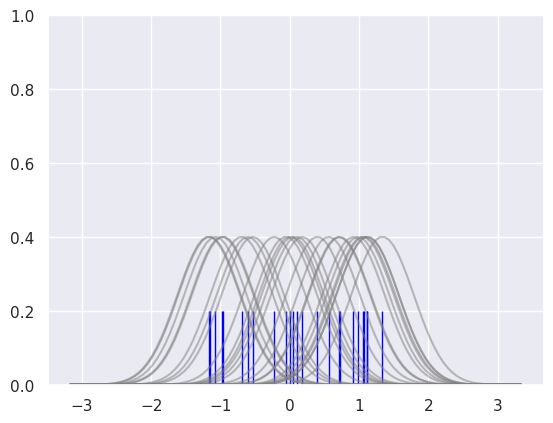

In [38]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset, height=0.2, color='blue');

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

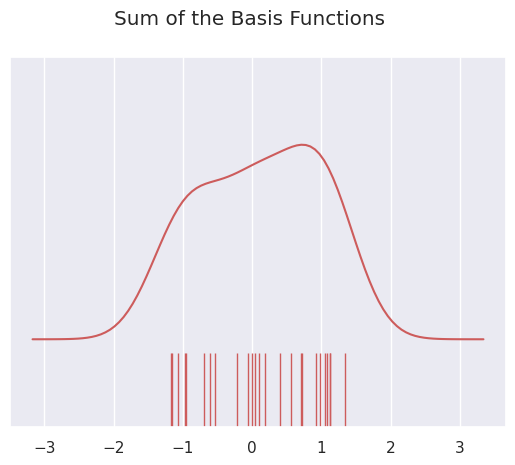

In [39]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred', height=0.2)

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

<Axes: xlabel='total_bill', ylabel='Density'>

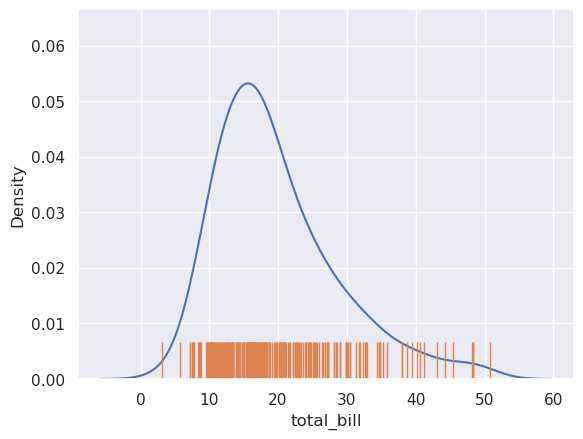

In [43]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'], height=0.1)

<Axes: xlabel='tip', ylabel='Density'>

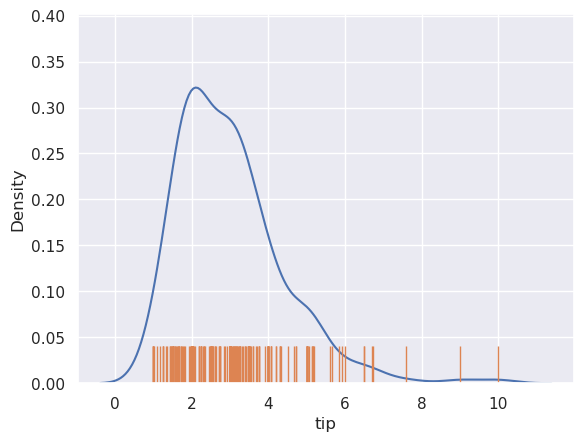

In [42]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'], height=0.1)

# Great Job!